In [46]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from submodules.cwsi.cwsi_function import ModelsInputData, CWSIModel

In [47]:
'''
 Load microclimate data
'''

# Microclimate Data Files
# # Daily average data
# file_name = "royal_city_daily_avg"
# # Late morning average data
# file_name = "royal_city_late_morning_avg"
# 15-min data
file_name = "royal_city_all"

data = pd.read_csv(os.path.join("microclimate_data", f"{file_name}.csv"))    
#print(data.head())

In [48]:
''' 
Feature engineering: Create new features based on existing ones
'''

# Feature engineering: Create new features based on existing ones
data['temperature_difference'] = data['air_temp'] - data['canopy_temp_mean']

# Calculate CWSI, Ta and Tp
# Create new columns to store CWSI values
data['cwsi'] = None
data['t_actual'] = None
data['t_potential'] = None

# Iterate through each row and calculate CWSI
for index, row in data.iterrows():
    microclimate_data = ModelsInputData()
    microclimate_data.Ta = row['air_temp']
    microclimate_data.Sgl = row['solar_radiation']
    microclimate_data.RH = row['relative_humidity']
    microclimate_data.U = row['wind_speed']
    microclimate_data.DOY = row['julian_day']
    microclimate_data.b2 = 3.0
    microclimate_data.b0 = 0.1
    microclimate_data.lat = 42.3
    microclimate_data.Elev = 2500
    Tc = row['canopy_temp_mean']

    model = CWSIModel(microclimate_data)
    data.loc[index, 'cwsi'] = model.CWSI(Tc)
    data.loc[index, 't_actual'] = model.T_Actual_F(Tc)
    data.loc[index, 't_potential'] = model.Tp_F()

print(data.head())

   julian_day  wind_speed  solar_radiation  relative_humidity  air_temp  \
0         102        7.10           463.69               0.60      8.57   
1         103        3.10           216.61               0.66      8.26   
2         104        2.66           326.67               0.81     11.36   
3         105        1.57           430.29               0.75     11.79   
4         106        5.80           200.49               0.63      7.51   

   canopy_temp_mean  soil_temp  water_content_mean  water_potential_mean  \
0             10.80        9.0                  29                -26.30   
1             10.10        8.9                  29                -25.73   
2             15.18        8.8                  29                -25.40   
3             17.85        9.0                  29                -25.26   
4              8.63        9.3                  29                -25.20   

   temperature_difference cwsi t_actual t_potential  
0                   -2.23    1    0.00

In [49]:
'''
Save the Data Frame
'''

# Construct the file path
file_path = os.path.join("microclimate_data", f"{file_name}_cwsi.csv")

# Save the DataFrame to a CSV file in the microclimate_data directory
data.to_csv(file_path, index=False)

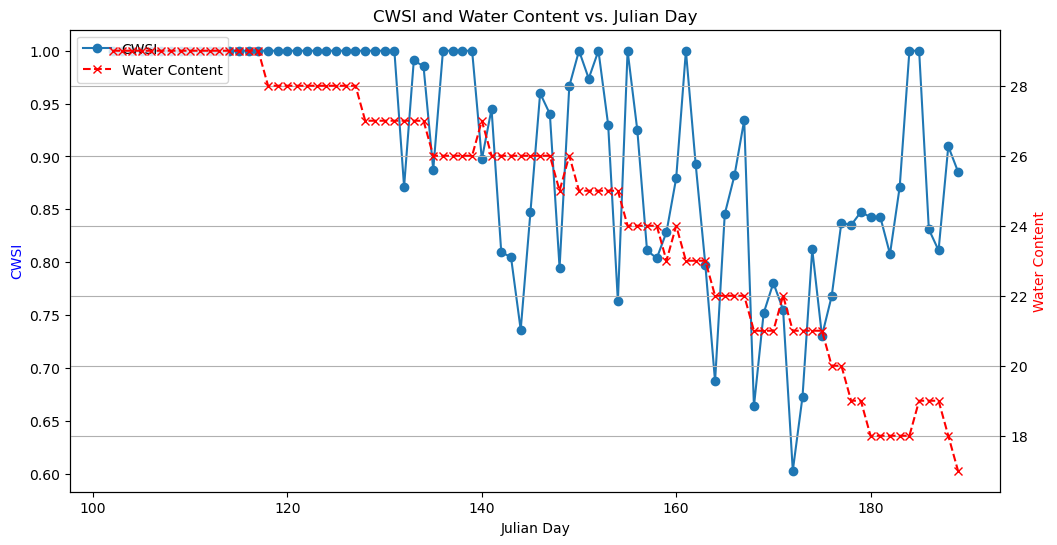

In [50]:
'''
Visualize the data
'''

# Create the figure and axes
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot CWSI on the first axis
ax1.plot(data['julian_day'], data['cwsi'], label='CWSI', marker='o', linestyle='-')
ax1.set_xlabel('Julian Day')
ax1.set_ylabel('CWSI', color='blue')

# Create a second axis sharing the x-axis
ax2 = ax1.twinx()

# Plot water_content_mean on the second axis
ax2.plot(data['julian_day'], data['water_content_mean'], label='Water Content', color='red', marker='x', linestyle='--')
ax2.set_ylabel('Water Content', color='red')

# Set title and legend
plt.title('CWSI and Water Content vs. Julian Day')

# Add the legend with unique labels
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc='upper left')  # Adjust the location as needed

# Show the plot
plt.grid(True)
plt.show()